In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

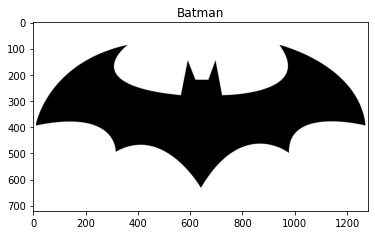

In [2]:
img=plt.imread('Logo-Batman.png')
plt.imshow(img)
plt.title('Batman')
plt.show()

<IPython.core.display.Javascript object>


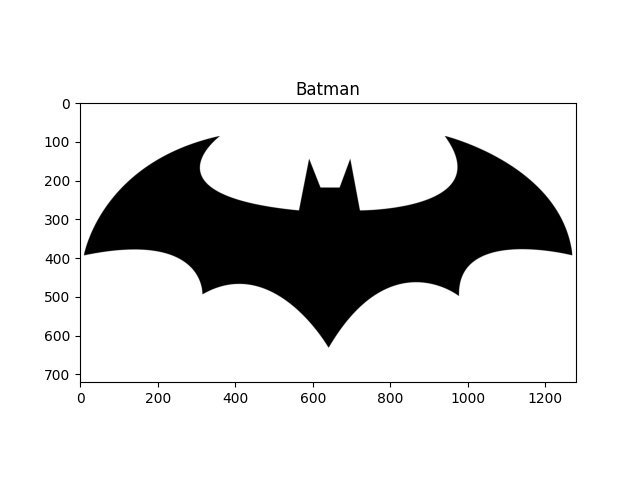

In [3]:
%matplotlib notebook
fig, ax = plt.subplots()
pos = []
def onclick(event):
    pos.append([event.xdata,event.ydata])
fig.canvas.mpl_connect('button_press_event', onclick)
plt.title('Batman')
plt.imshow(img)

In [4]:
pos

[[12.32258064516131, 373.0645161290322],
 [66.51612903225805, 269.8387096774194],
 [128.4516129032258, 192.41935483870964],
 [200.70967741935482, 143.38709677419354],
 [275.5483870967742, 104.67741935483878],
 [324.5806451612903, 86.61290322580646],
 [352.96774193548384, 78.87096774193549],
 [324.5806451612903, 120.16129032258061],
 [309.09677419354836, 176.9354838709678],
 [324.5806451612903, 202.74193548387098],
 [358.12903225806457, 225.9677419354839],
 [386.5161290322581, 238.8709677419355],
 [435.5483870967742, 254.35483870967744],
 [497.4838709677419, 254.35483870967744],
 [528.4516129032259, 267.258064516129],
 [562.0, 272.41935483870964],
 [587.8064516129032, 151.1290322580645],
 [613.6129032258063, 213.0645161290323],
 [665.2258064516129, 213.0645161290323],
 [703.9354838709678, 151.1290322580645],
 [719.4193548387098, 262.0967741935484],
 [719.4193548387098, 264.67741935483866],
 [760.7096774193549, 275.0],
 [791.6774193548388, 267.258064516129],
 [861.3548387096773, 259.5161

In [5]:
pos_array = np.array(pos)

In [6]:
x = pos_array[:,0]

In [7]:
y = pos_array[:,1]

In [8]:
t = np.linspace(0,1, len(x))

In [9]:
pw_spline_x = interp1d(t, x, kind = 'cubic') #spline piecewise 
pw_spline_y = interp1d(t,y, kind = 'cubic') #spline piecewise 

In [10]:
neval = 100
teval = np.linspace(min(t),max(t), neval)

In [11]:
xeval = pw_spline_x(teval)
yeval = pw_spline_y(teval)

In [12]:
window_y = 50
window_x = 500    
x_min = np.min(x)
y_min = np.min(y)
x_max = np.max(x)
y_max = np.max(y)

<IPython.core.display.Javascript object>


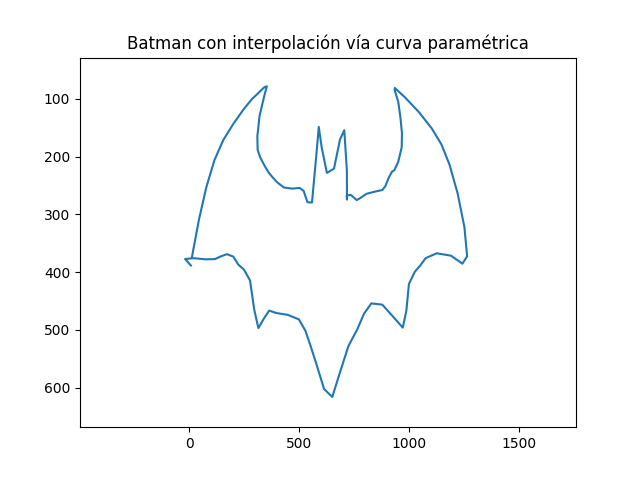

In [13]:
fig, ax = plt.subplots()
ax.plot(xeval,yeval)
ax.set_ylim(np.max(y)+window_y,np.min(y)-window_y)
plt.xlim(np.min(x)-window_x,np.max(x)+window_x)
plt.title('Batman con interpolación vía curva paramétrica')
plt.show()

In [15]:
def make_plot(ax, idx):
    ax.plot(x[:idx], y[:idx])
    ax.set_ylim(y_max+window_y,y_min-window_y)
    plt.xlim(x_min-window_x,x_max+window_x)
    plt.plot(x[:idx], y[:idx], 'bo-')
    plt.title('Colibrí con interpolación vía curva paramétrica')
    fig.canvas.draw()

<IPython.core.display.Javascript object>


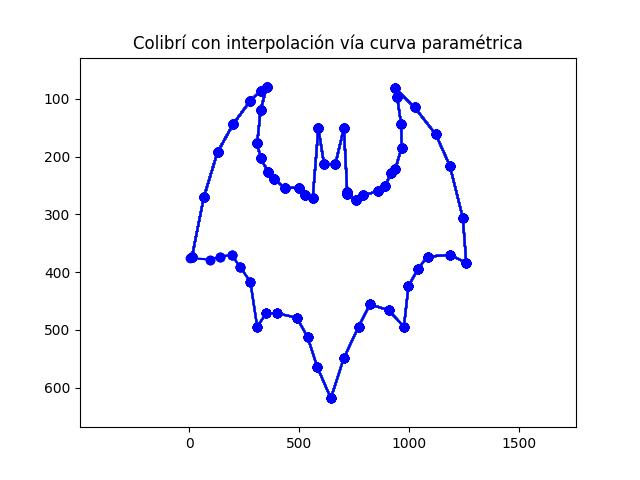

In [16]:
%matplotlib notebook
fig, ax = plt.subplots()
for idx,_ in enumerate(t):
    make_plot(ax, idx)
    time.sleep(0.2)